In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/Google Colab Notebooks/Mini Sem 8/dataset/large sample/IBM_2years_60Min.csv')

In [3]:
print(raw_data.shape)
raw_data.head()

(6707, 7)


,Unnamed: 0,time,open,high,low,close,volume
0,0,2020-04-27 05:00:00,108.325771,108.325771,108.325771,108.325771,344
1,1,2020-04-27 08:00:00,108.153113,108.714252,108.153113,108.714252,2625
2,2,2020-04-27 09:00:00,108.774682,109.525746,108.774682,109.033670,8240
3,3,2020-04-27 10:00:00,108.774682,109.577543,108.317138,109.180429,760734
4,4,2020-04-27 11:00:00,109.189062,109.504163,108.627923,109.094791,595594


In [4]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

In [ ]:
# reversing the dataframe 
# close_ds_rev = close_ds.loc[::-1, :]
# close_ds_rev.head()

,time,close
6706,2022-04-14 20:00:00,126.70
6705,2022-04-14 19:00:00,126.75
6704,2022-04-14 18:00:00,126.66
6703,2022-04-14 17:00:00,126.66
6702,2022-04-14 16:00:00,126.51


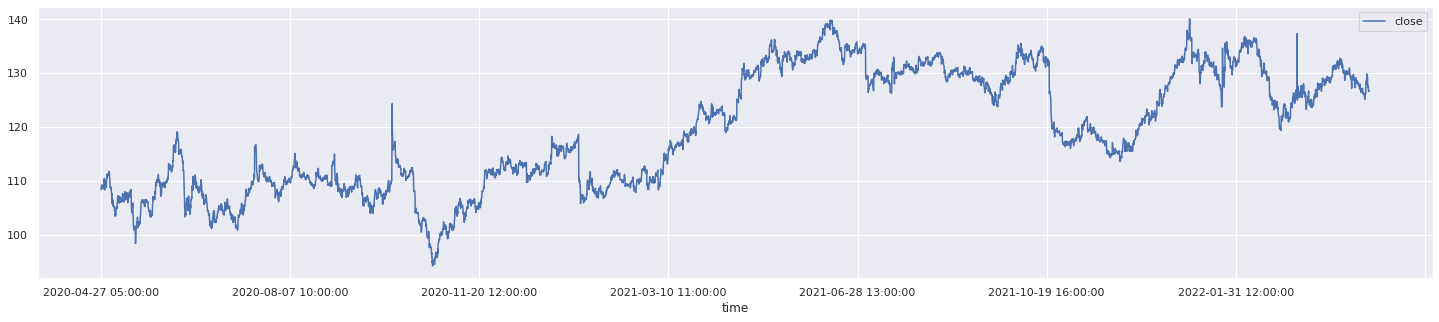

In [5]:
close_ds.plot(x='time', y='close', figsize=(25, 5))

In [6]:
# converting time serires into a supervised learning problem
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [7]:
# n_in ---> number of previous data points (lag observations) to consider as input
# n_out --> number of datapoints to predict
# dataset ----> dataframe with (n_in + n_out + 1 [for current timestamp]) numbers of columns used for supervised training of the model 

n_in = 50
n_out = 1
dataset = series_to_supervised(close_ds.drop('time', axis=1), n_in, n_out)
print(dataset.shape)
dataset.head()

(6656, 52)


,close(t-50),close(t-49),close(t-48),close(t-47),close(t-46),close(t-45),close(t-44),close(t-43),close(t-42),close(t-41),...,close(t-8),close(t-7),close(t-6),close(t-5),close(t-4),close(t-3),close(t-2),close(t-1),close(t),close(t+1)
50,108.325771,108.714252,109.033670,109.180429,109.094791,109.141581,108.835113,108.925758,109.059569,108.653822,...,111.494050,111.209163,111.364556,110.501265,110.414936,109.374670,108.869645,108.653822,108.904176,108.489796
51,108.714252,109.033670,109.180429,109.094791,109.141581,108.835113,108.925758,109.059569,108.653822,108.610657,...,111.209163,111.364556,110.501265,110.414936,109.374670,108.869645,108.653822,108.904176,108.489796,108.727633
52,109.033670,109.180429,109.094791,109.141581,108.835113,108.925758,109.059569,108.653822,108.610657,108.774682,...,111.364556,110.501265,110.414936,109.374670,108.869645,108.653822,108.904176,108.489796,108.727633,108.317138
53,109.180429,109.094791,109.141581,108.835113,108.925758,109.059569,108.653822,108.610657,108.774682,108.515695,...,110.501265,110.414936,109.374670,108.869645,108.653822,108.904176,108.489796,108.727633,108.317138,108.014986
54,109.094791,109.141581,108.835113,108.925758,109.059569,108.653822,108.610657,108.774682,108.515695,108.472531,...,110.414936,109.374670,108.869645,108.653822,108.904176,108.489796,108.727633,108.317138,108.014986,107.911391


In [8]:
# train test split

from sklearn.model_selection import train_test_split
target = dataset.loc[:, ['close(t+1)']]
features = dataset.drop('close(t+1)', axis=1)
print(target.shape)
print(features.shape)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(6656, 1)
(6656, 51)
(4659, 51)
(4659, 1)
(1997, 51)
(1997, 1)


In [9]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (4659, 51, 1)
Validation set shape (1997, 51, 1)


In [10]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

# CNN

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 50)                80050     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 80,293
Trainable params: 80,293
Non-trainable params: 0
____________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
cnn_history = model_cnn.fit(X_train_series, y_train.values, validation_data=(X_test_series, y_test.values), epochs=40, verbose=2)

Epoch 1/40
146/146 - 3s - loss: 341.1891 - val_loss: 3.6834 - 3s/epoch - 18ms/step
Epoch 2/40
146/146 - 1s - loss: 3.4623 - val_loss: 3.6843 - 831ms/epoch - 6ms/step
Epoch 3/40
146/146 - 1s - loss: 3.4584 - val_loss: 3.6132 - 901ms/epoch - 6ms/step
Epoch 4/40
146/146 - 1s - loss: 3.3726 - val_loss: 3.5295 - 817ms/epoch - 6ms/step
Epoch 5/40
146/146 - 1s - loss: 3.3272 - val_loss: 3.7700 - 850ms/epoch - 6ms/step
Epoch 6/40
146/146 - 1s - loss: 3.3317 - val_loss: 3.5583 - 813ms/epoch - 6ms/step
Epoch 7/40
146/146 - 1s - loss: 3.1712 - val_loss: 3.2466 - 827ms/epoch - 6ms/step
Epoch 8/40
146/146 - 1s - loss: 3.1269 - val_loss: 3.3048 - 844ms/epoch - 6ms/step
Epoch 9/40
146/146 - 1s - loss: 3.1156 - val_loss: 3.0454 - 843ms/epoch - 6ms/step
Epoch 10/40
146/146 - 1s - loss: 3.0178 - val_loss: 3.0133 - 794ms/epoch - 5ms/step
Epoch 11/40
146/146 - 1s - loss: 2.8536 - val_loss: 3.2445 - 816ms/epoch - 6ms/step
Epoch 12/40
146/146 - 1s - loss: 2.7577 - val_loss: 3.0696 - 737ms/epoch - 5ms/step
E

Text(0, 0.5, 'MSE')

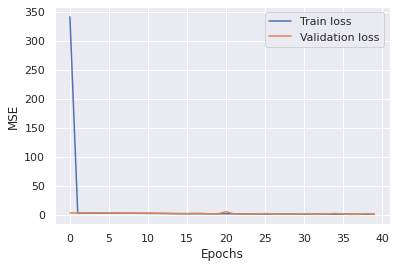

In [12]:
# plots 
fig = plt.figure()
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [13]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
cnn_train_pred = model_cnn.predict(X_train)
cnn_test_pred = model_cnn.predict(X_test)
print('Train rmse:', np.sqrt(mean_squared_error(y_train.values, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_test.values, cnn_test_pred)))

Train rmse: 1.0082099827459656
Validation rmse: 1.0281039688079379


In [14]:
print(y_test.values[:10])
print(cnn_test_pred[:10])

[[126.00434588]
 [125.82730805]
 [124.64394993]
 [124.40168764]
 [124.26192093]
 [124.20601425]
 [125.46391461]
 [125.57572798]
 [125.24028788]
 [124.40168764]]
[[125.98791 ]
 [125.97476 ]
 [125.838005]
 [125.750465]
 [125.55493 ]
 [125.37686 ]
 [125.0141  ]
 [125.02867 ]
 [125.05014 ]
 [125.08336 ]]


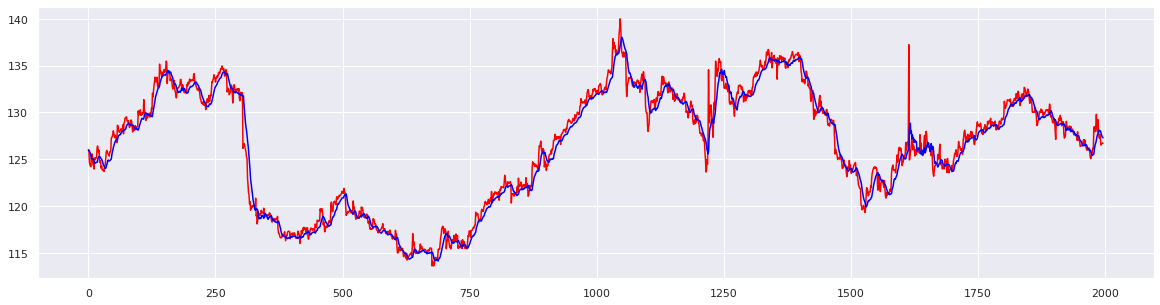

In [15]:

plt.figure(figsize=(20, 5))
plt.plot(y_test.values.flatten(), color='red')
plt.plot(cnn_test_pred.flatten(), color='blue')

In [19]:
X_test.iloc[1, -1]

126.004345884

In [20]:
# classification accuracy 

y_test_flattened = y_test.values.flatten()
cnn_test_pred_flattened = cnn_test_pred.flatten()
total_number_of_samples = len(X_test)
no_of_correct_predictions = 0
for i in range(0, total_number_of_samples):
    prev_value = X_test.iloc[i, -1]
    actual_value = y_test_flattened[i]
    predicted_value = cnn_test_pred_flattened[i]
    if ((prev_value > actual_value and prev_value > predicted_value) or prev_value < actual_value and prev_value < predicted_value):
        no_of_correct_predictions += 1

print(f'Accuracy of correct trend prediction = {no_of_correct_predictions / total_number_of_samples}');


Accuracy of correct trend prediction = 0.5047571357035553
